In [1]:
%pylab inline
from analysis_toolbox import *
from qualityBaseline import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../../BoundingBoxArchive/Code/

/Users/dorislee/Desktop/Research/seg/BoundingBoxArchive/Code


In [3]:
from greedy import *
from data import *
from experiment import *
import pandas as pd 

In [4]:
# Generate M regions; Each region belongs to k annotators of a total of N
TestSet = SimulateSingleObject(N=10,M=50,IntersectionArea=10,MaxAreaOfOtherRegions=100)

In [5]:
TestSet.createNewMapping()

In [6]:
# TestSet.RegionToAreaMapping

In [7]:
gen_data = gen_data(10,100,10,100,10,100)

indicator is a binary vector that indicates whether the worker's annotation covered the specified region or not. 

In [8]:
# np.array(generateRawData(TestSet))

In [9]:
shape(np.array(generateRawData(TestSet)))

(11, 50)

In [10]:
bb_info = pd.read_csv('../../crowd-seg/analysis/computed_my_COCO_BBvals.csv')
obj_sorted_tbl =  bb_info[bb_info['Jaccard [COCO]']!=-1][bb_info['Jaccard [COCO]']!=0][bb_info['Jaccard [Self]']!=0].sort('object_id')
object_id_lst  = list(set(obj_sorted_tbl.object_id))

for objid in object_id_lst:

    # Ji_tbl (bb_info) is the set of all workers that annotated object i 
    bb_objects  = obj_sorted_tbl[obj_sorted_tbl["object_id"]==objid]

In [11]:
# for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"]):
#     xloc,yloc = process_raw_locs([x,y])

In [12]:
xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [13]:
polygon_lst = []
for xyloc in xylocs:
    polygon_lst.append(Polygon(xyloc))

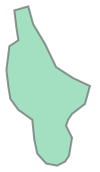

In [14]:
Polygon(xyloc)

In [15]:
from shapely.geometry import MultiPolygon

In [16]:
Ji_polygons = MultiPolygon(polygon_lst)
Ji_polygons_buffered = Ji_polygons.buffer(0.001)

In [17]:
import shapely

In [18]:
obj_x_locs = [process_raw_locs([x,y])[0] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
obj_y_locs = [process_raw_locs([x,y])[1] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [67]:
from PIL import Image, ImageDraw
height =500
width=200
mega_mask = np.zeros((height,width))
img = Image.new('L', (width, height), 0)
for x_locs, y_locs in zip(obj_x_locs,obj_y_locs):
    ImageDraw.Draw(img).polygon(zip(x_locs,y_locs), outline=1, fill=1)
    mask = np.array(img)==1
    mega_mask+=mask

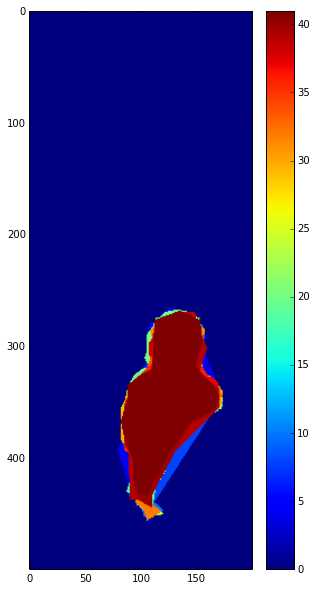

In [84]:
plt.figure(figsize=(5,10))
plt.imshow(mega_mask)
plt.colorbar()
X,Y = np.meshgrid(width,height)
# plt.contour(X,Y,unique(mega_mask))

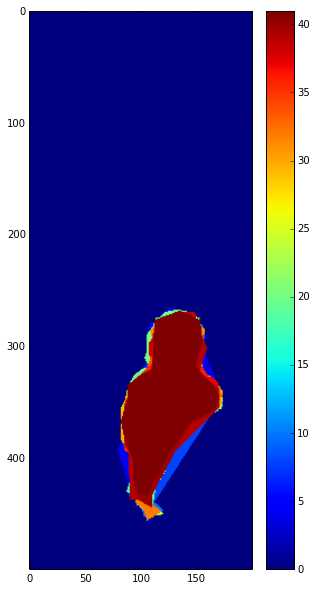

In [68]:
plt.figure(figsize=(5,10))
plt.imshow(mega_mask)
plt.colorbar()
X,Y = np.meshgrid(width,height)
# plt.contour(X,Y,unique(mega_mask))

In [21]:
import cv2

In [56]:
mega_mask.dtype=np.float32

In [57]:
vis2 = cv2.cvtColor(mega_mask, cv2.COLOR_GRAY2BGR)

In [58]:
ret,thresh = cv2.threshold(vis2,127,255,0)

In [69]:
mega_mask= np.uint8(mega_mask)
edges = cv2.Canny(mega_mask,threshold1=0,threshold2=200)

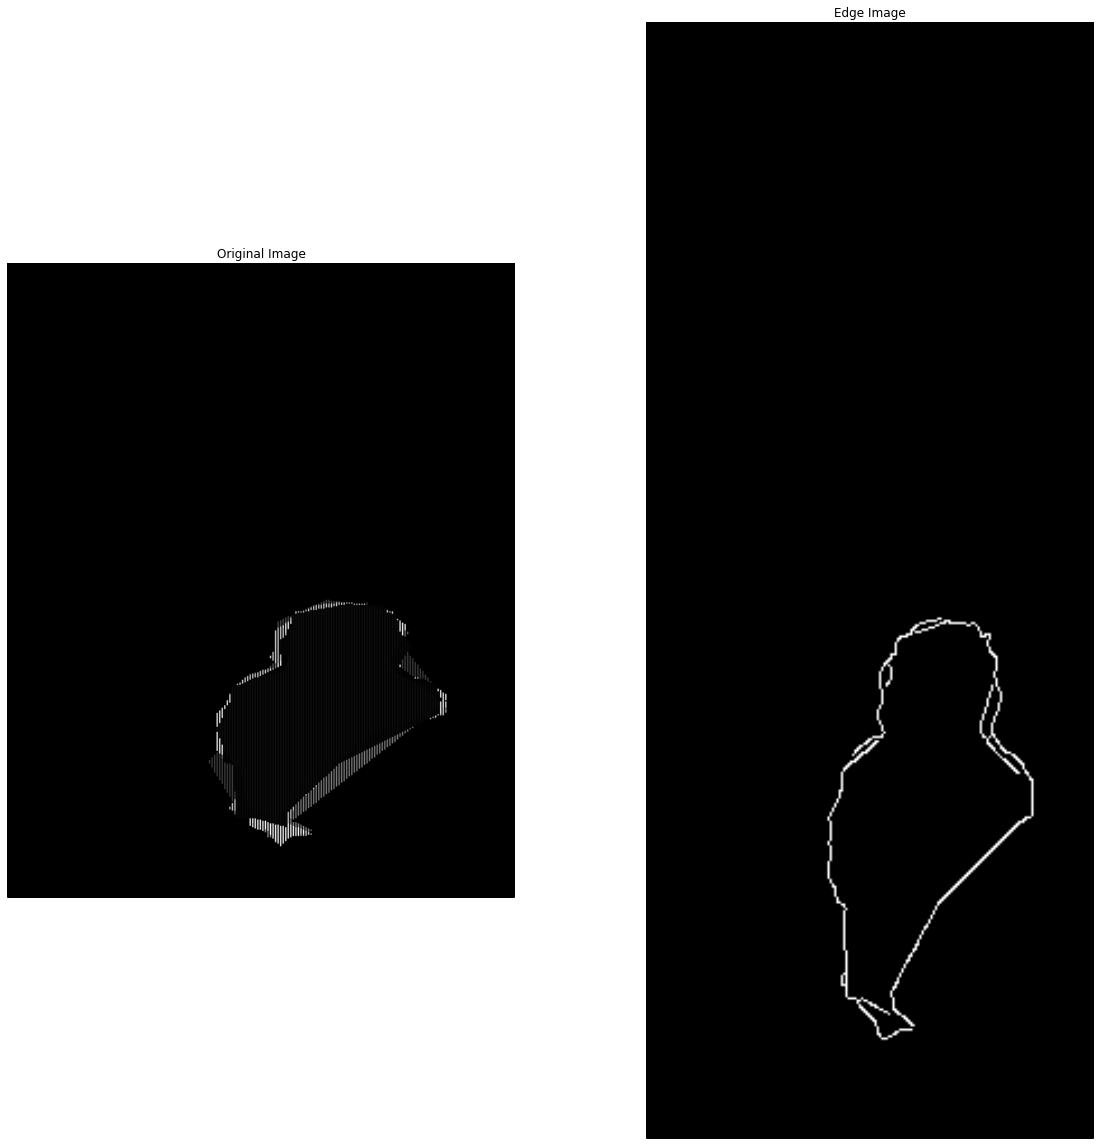

In [70]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(vis2,cmap = 'gray')
plt.title('Original Image')
# plt.colorbar()
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [80]:
import mpld3
mpld3.enable_notebook()

In [81]:
def plotContour(img,contour_lst,title=""):
    plt.title(title)
    plt.imshow(img,cmap= cm.Greys)
    for c in contour_lst:
        x,y = zip(*c[:,0])
        plt.plot(x,y,color='cyan',linewidth=0.5)
    dim = shape(img)
    plt.xlim(0,dim[1])
    plt.ylim(dim[0],0)

In [82]:
im2 , contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

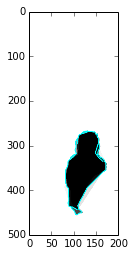

In [83]:
plotContour(mega_mask,contours)

In [71]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/contours.cpp:198: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours


In [43]:
im = mega_mask
edged = cv2.Canny(vis2, 30, 200)
contours, hierarchy = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/canny.cpp:599: error: (-215) depth == CV_8U in function Canny


In [ ]:
cv2.findContours()

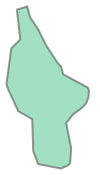

In [21]:
Ji_polygons[0].intersection(Ji_polygons[1])

In [85]:
from shapely.geometry import LineString
layer = polygon_lst
rings = [LineString(list(pol.exterior.coords)) for pol in layer]
from shapely.ops import unary_union, polygonize

In [89]:
union = unary_union(rings)

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (103.333 327.917, 103 328) and LINESTRING (104.2 327.2, 103 328) at 103.00000000000006 328


ValueError: No Shapely geometry can be created from null value

In [ ]:
result = [geom for geom in polygonize(union)]

In [ ]:
schema=layer.schema.copy()
schema['properties']['area'] = 'float:10.2'
# for index, pol in enumerate(result):
#    #c.write({'geometry': mapping(pol),'properties': {'id': index, 'area': pol.area}})

In [45]:
union =unary_union(polygon_lst)

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 152 274 at 152 274


ValueError: No Shapely geometry can be created from null value

In [ ]:
rings = [LineString(pol.exterior.coords) for pol in circles]
union = unary_union(rings)
result = [geom for geom in polygonize(union)]

In [42]:
circles = polygon_lst

In [44]:
import itertools
for  i,j in itertools.combinations(enumerate(circles), 2):
    if i[1].intersects(j[1]):
        print "polygons", i[0],j[0] 


for  i,j in itertools.permutations(enumerate(circles), 2):
    if i[1].intersects(j[1]):
        print "polygons", i[0],j[0]

polygons 0 1
polygons 0 2
polygons 0 3
polygons 0 4
polygons 0 5
polygons 0 6
polygons 0 7
polygons 0 8
polygons 0 9
polygons 0 10
polygons 0 11
polygons 0 12
polygons 0 13
polygons 0 14
polygons 0 15
polygons 0 16
polygons 0 17
polygons 0 18
polygons 0 19
polygons 0 20
polygons 0 21
polygons 0 22
polygons 0 23
polygons 0 24
polygons 0 25
polygons 0 26
polygons 0 27
polygons 0 28
polygons 0 29
polygons 0 30
polygons 0 31
polygons 0 32
polygons 0 33
polygons 0 34
polygons 0 35
polygons 0 36
polygons 0 37
polygons 0 38
polygons 0 39
polygons 0 40
polygons 1 2
polygons 1 3
polygons 1 4
polygons 1 5
polygons 1 6
polygons 1 7
polygons 1 8
polygons 1 9
polygons 1 10
polygons 1 11
polygons 1 12
polygons 1 13
polygons 1 14
polygons 1 15
polygons 1 16
polygons 1 17
polygons 1 18
polygons 1 19
polygons 1 20
polygons 1 21
polygons 1 22
polygons 1 23
polygons 1 24
polygons 1 25
polygons 1 26
polygons 1 27
polygons 1 28
polygons 1 29
polygons 1 30
polygons 1 31
polygons 1 32
polygons 1 33
polygons 

## flood fill technique

In [96]:
from PIL import Image, ImageDraw
height =500
width=200
mega_mask = np.zeros((height,width))
img = Image.new('L', (width, height), 0)
for x_locs, y_locs in zip(obj_x_locs,obj_y_locs):
    ImageDraw.Draw(img).polygon(zip(x_locs,y_locs), outline=1, fill=1)
    mask = np.array(img)==1
    mega_mask+=mask

In [102]:
ImageDraw.Outline()

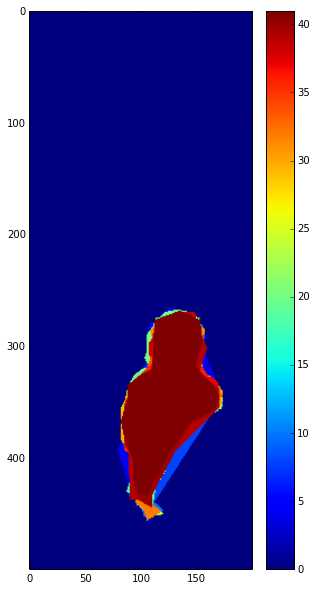

In [97]:
plt.figure(figsize=(5,10))
plt.imshow(mega_mask)
plt.colorbar()
X,Y = np.meshgrid(width,height)
# plt.contour(X,Y,unique(mega_mask))

In [103]:
for polygon in polygon_lst:
    polygon.buffer(0)

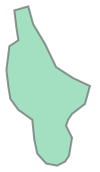

In [110]:
polygon

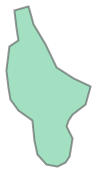

In [106]:
polygon.buffer(0.1)